In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import os


In [4]:
# Load dataset
file_path = "/Dataset .csv"
df = pd.read_csv(file_path)

OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [5]:
# ================== Task 1: Data Exploration & Preprocessing ==================

# 1) Missing values
missing_summary = df.isna().sum().to_frame("missing_count")
missing_summary["missing_%"] = (df.isna().mean()*100).round(2)
print("Missing values summary:\n", missing_summary)

Missing values summary:
                       missing_count  missing_%
Restaurant ID                     0       0.00
Restaurant Name                   0       0.00
Country Code                      0       0.00
City                              0       0.00
Address                           0       0.00
Locality                          0       0.00
Locality Verbose                  0       0.00
Longitude                         0       0.00
Latitude                          0       0.00
Cuisines                          9       0.09
Average Cost for two              0       0.00
Currency                          0       0.00
Has Table booking                 0       0.00
Has Online delivery               0       0.00
Is delivering now                 0       0.00
Switch to order menu              0       0.00
Price range                       0       0.00
Aggregate rating                  0       0.00
Rating color                      0       0.00
Rating text                       0

In [6]:
# 2) Data type conversions
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce").fillna(0).astype(int)
df["Price range"] = pd.to_numeric(df["Price range"], errors="coerce").fillna(0).astype(int)
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")


In [7]:
# 3) Handle categorical nulls
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


In [8]:
# 4) Rating distribution (check imbalance)
plt.figure()
df["Aggregate rating"].plot(kind="hist", bins=20)
plt.title("Aggregate Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/rating_hist.png", dpi=150)



In [9]:
# ================== Task 2: Descriptive Analysis ==================

# 1) Numeric descriptive stats
print("\nNumeric descriptive stats:\n", df.describe().T)



Numeric descriptive stats:
                        count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
La

In [10]:
# 2) Top Countries, Cities, Cuisines
print("\nTop Countries:\n", df["Country Code"].value_counts().head(10))
print("\nTop Cities:\n", df["City"].value_counts().head(10))
print("\nTop Cuisines:\n", df["Cuisines"].value_counts().head(10))



Top Countries:
 Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

Top Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

Top Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


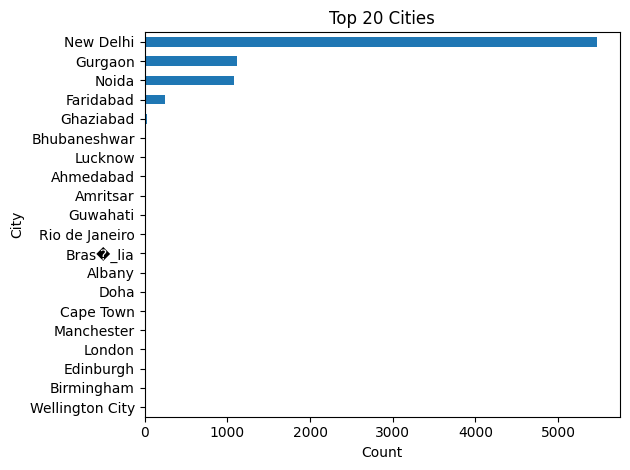

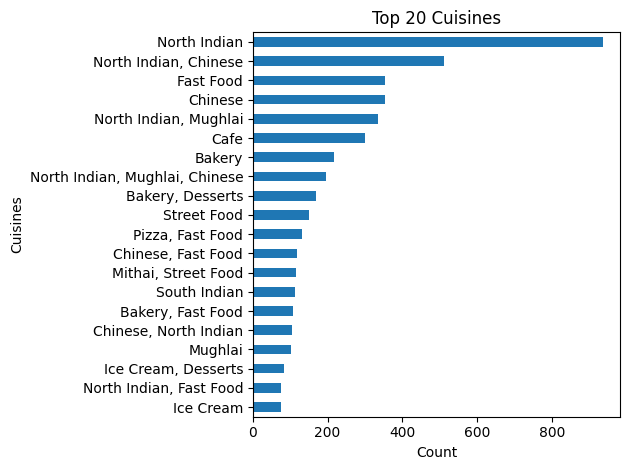

In [11]:
# 3) Plots
def save_bar(series, title, filename):
    plt.figure()
    series.iloc[::-1].plot(kind="barh")
    plt.title(title)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/{filename}", dpi=150)

save_bar(df["City"].value_counts().head(20), "Top 20 Cities", "top_cities.png")
save_bar(df["Cuisines"].value_counts().head(20), "Top 20 Cuisines", "top_cuisines.png")



In [12]:
# ================== Task 3: Geospatial Analysis ==================

# 1) Interactive map (sampled points)
fmap = folium.Map(location=[df["Latitude"].median(), df["Longitude"].median()], zoom_start=3)

sample = df[["Latitude", "Longitude", "City", "Aggregate rating"]].dropna().head(2000)
for _, row in sample.iterrows():
    folium.CircleMarker(
        radius=2,
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['City']} | Rating: {row['Aggregate rating']}"
    ).add_to(fmap)

fmap.save(f"{OUTPUT_DIR}/restaurants_map.html")


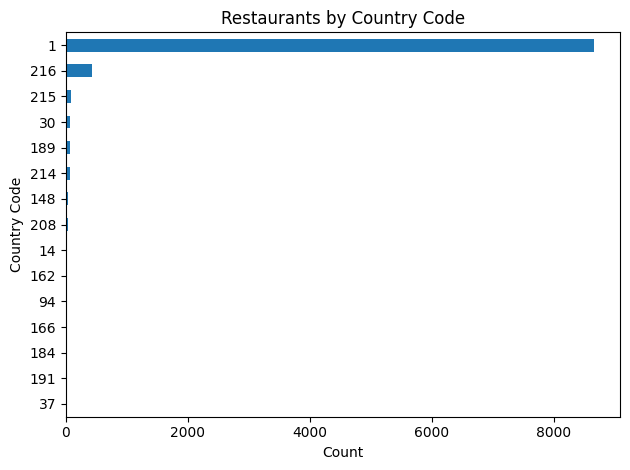

In [13]:
# 2) Distribution by city/country
save_bar(df["City"].value_counts().head(20), "Restaurants by City", "city_distribution.png")
save_bar(df["Country Code"].value_counts().head(20), "Restaurants by Country Code", "country_distribution.png")


In [14]:
# 3) Location vs rating correlation
corr_lat = df[["Latitude", "Aggregate rating"]].dropna().corr().iloc[0,1]
corr_lon = df[["Longitude", "Aggregate rating"]].dropna().corr().iloc[0,1]
print(f"\nCorrelation (Latitude, Rating): {corr_lat:.3f}")
print(f"Correlation (Longitude, Rating): {corr_lon:.3f}")



Correlation (Latitude, Rating): 0.001
Correlation (Longitude, Rating): -0.117
